# May 24th 2017

Code from "A Crash Course in Scientific Python: 2D STIS Reduction"

After following the steps to have the terminal bring over the other files containing the data, I switched over to using a notebook to be able to see the work later on.

https://python4astronomers.github.io/core/numpy_scipy.html

In [61]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
plt.style.use('classic')
hdus = fits.open('py4ast/core/3c120_stis.fits.gz')
hdus

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f2b94330080>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f2b943d3710>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f2b8cefe358>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f2b95c144e0>]

In [62]:
# hdus?  # shows you what exactly hdus does, it basically acts like 
         # a list of values, one for each header data unit in the 
         # FITS file

In [63]:
primary = hdus[0].data # Primary (NULL) header data unit
img = hdus[1].data     # Intensity data
err = hdus[2].data     # Error per pixel
dq = hdus[3].data      # Data quality per pixel

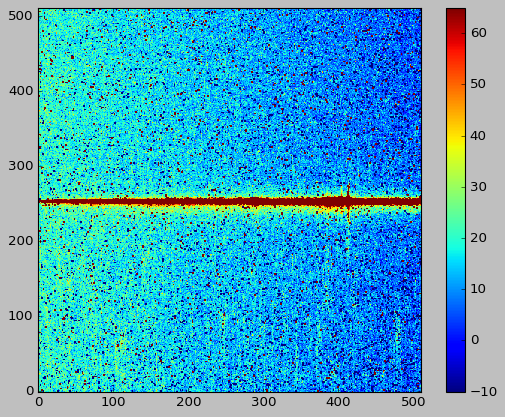

In [64]:
plt.imshow(img)
plt.clf()
plt.imshow(img, origin = 'lower', vmin=-10, vmax=65) # For color bar
plt.colorbar()
plt.show()

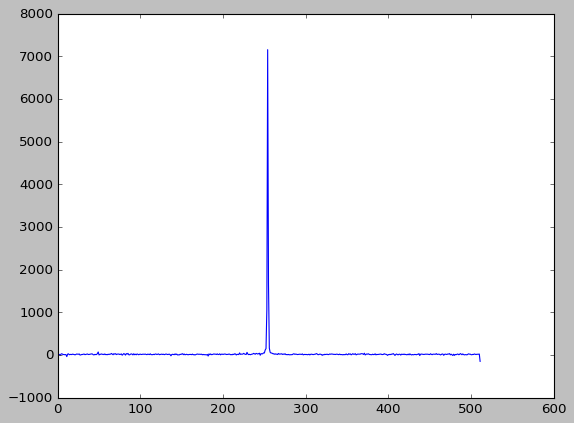

In [37]:
plt.plot(img[:,300],'b')
plt.show()         # Plotting column 300 of the STIS long slit image

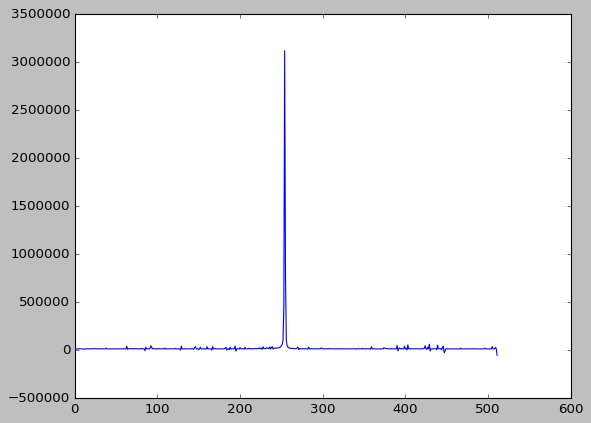

In [38]:
profile = img.sum(axis=1)
plt.plot((profile),'b')
plt.show()       # Plots the spatial profile by summing along the 
                 # wavelngth direction

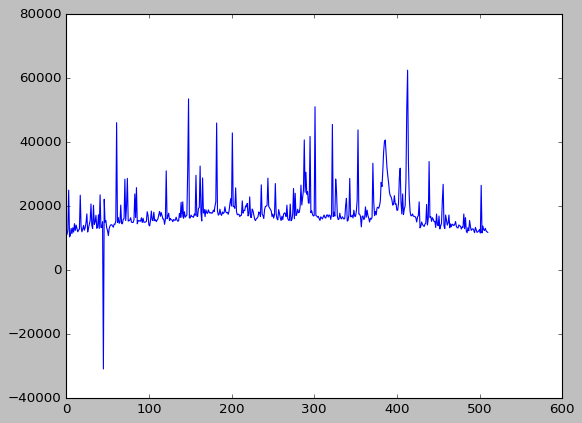

In [43]:
spectrum = img.sum(axis=0)
plt.plot((spectrum),'b')
plt.show()     # Plots the spectrum by summing along the spatial direction

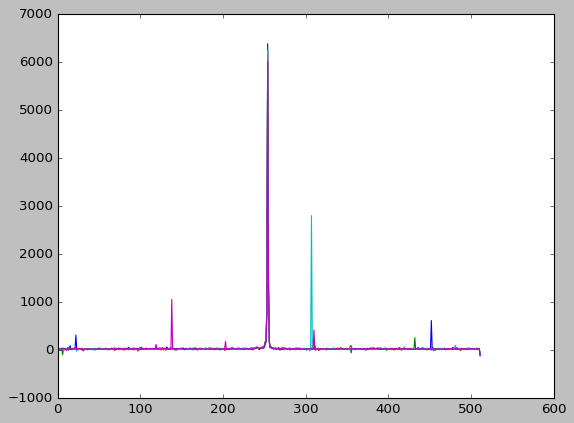

In [44]:
plt.clf()
plt.plot(img[:,254:259])
plt.show()      # Isolating the data from five adjacent wavelength bins

In [45]:
# Cosmic ray filtering

import scipy.signal
img_sm = scipy.signal.medfilt(img,5)
sigma = np.median(err)
bad = (np.abs(img - img_sm) / sigma) > 8.0
img_cr = img.copy()
img_cr[bad] = img_sm[bad]
img_cr[230:280,:] = img[230:280,:] # Filters only for background

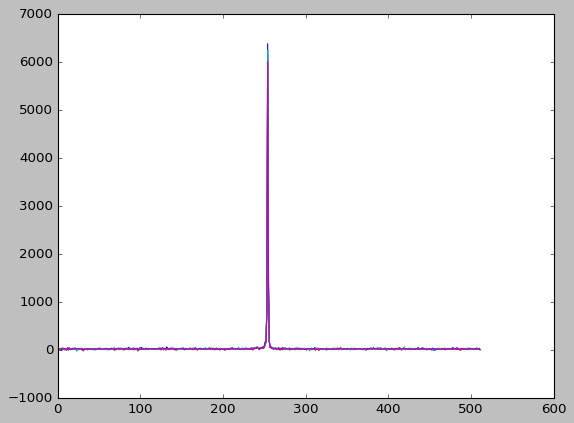

In [46]:
plt.clf()
plt.plot(img_cr[:,254:259])
plt.show()

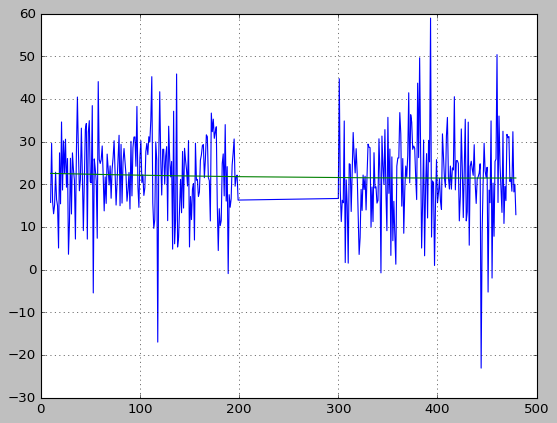

In [47]:
# Isolating the background

x = np.append(np.arange(10,200), np.arange(300,480)) # Background rows
y = img_cr[x,10] # Background rows in column 10 of cleaned image
plt.plot(x,y)
pfit = np.polyfit(x,y,2) # Fit a 2nd order polynomial to (x,y) data
yfit = np.polyval(pfit,x) # Evaluate the polynomial at x
plt.plot(x,yfit)
plt.grid()
plt.show()

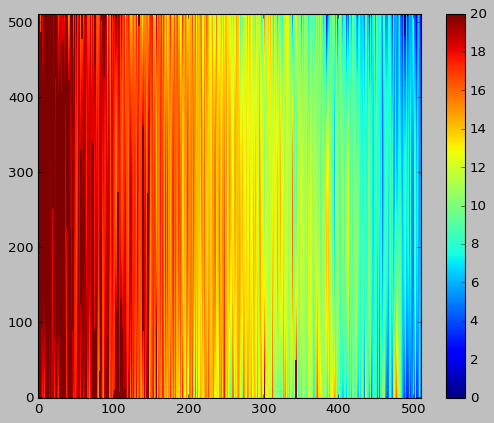

In [48]:
# Now we are storing this for every column in a background image

xrows = np.arange(img_cr.shape[0])       # Array from 0 .. N rows -1
bkg = np.zeros_like(img_cr)              # Empty image for backround fits
for col in np.arange(img_cr.shape[1]):   # For each column ...
    pfit = np.polyfit(x,img_cr[x,col],2) # Fit poly over bkg rows for col
    bkg[:,col] = np.polyval(pfit,xrows)  # Eval poly at all row positions
    
plt.clf()
plt.imshow(bkg, origin ='lower', vmin=0, vmax=20)
plt.colorbar()
plt.show()    

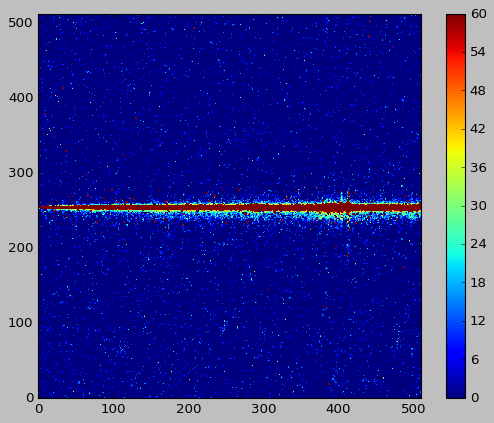

In [52]:
img_bkg = img_cr - bkg
plt.clf()
plt.imshow(img_bkg, origin = 'lower', vmin=0, vmax=60)
plt.colorbar()
plt.show()